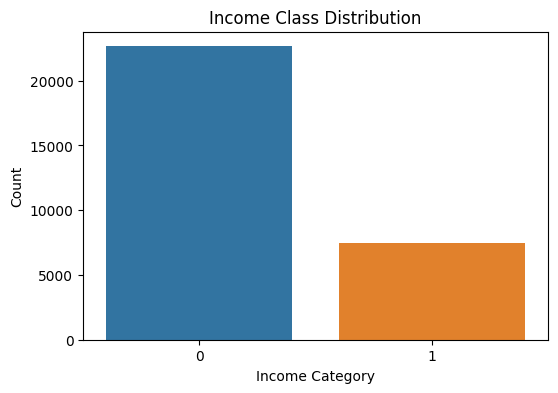

Class distribution (%):
income
0    75.107751
1    24.892249
Name: proportion, dtype: float64


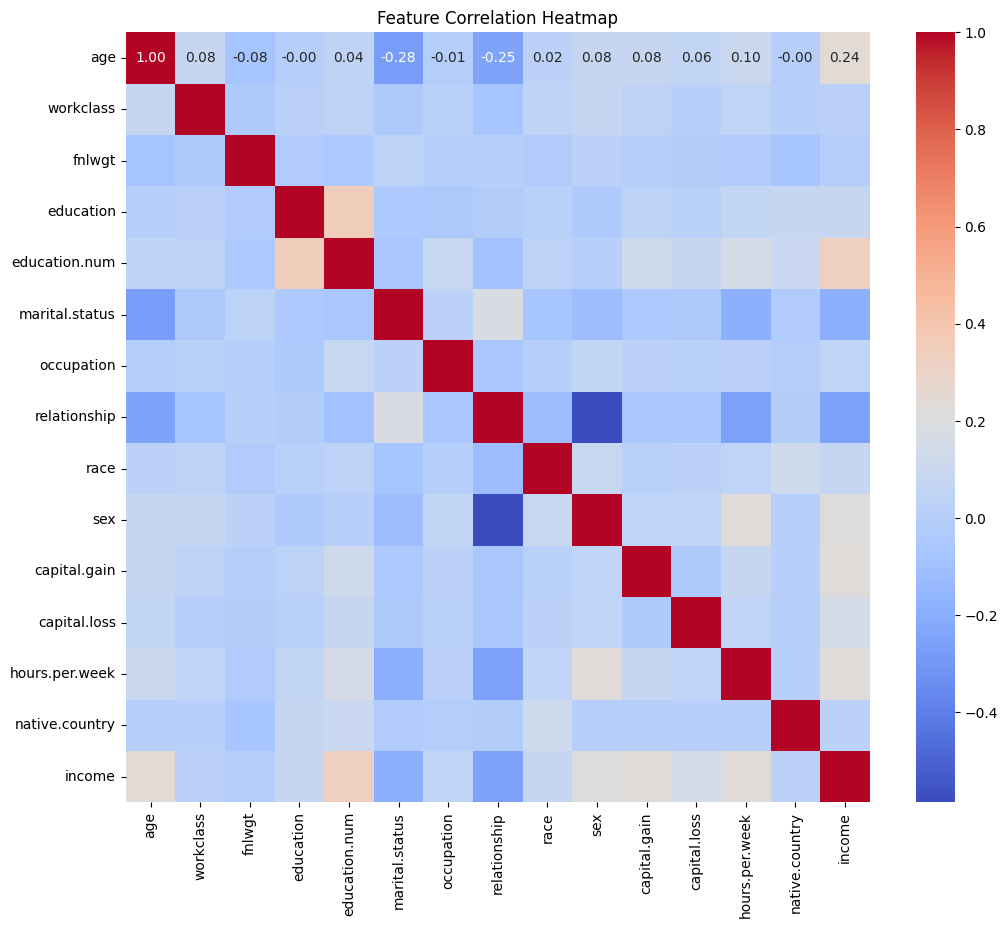

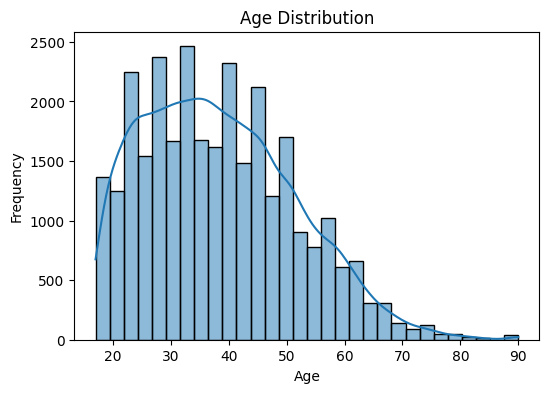

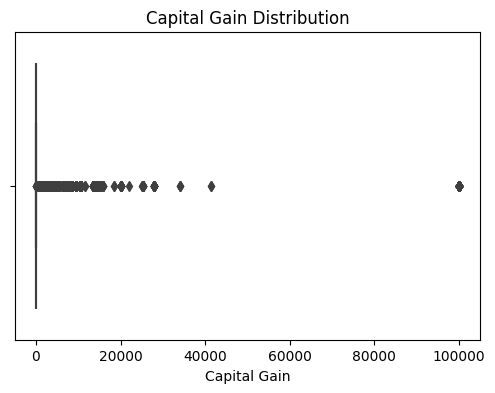

Explained variance by each component: [0.1490945  0.10109314 0.08199874]
Total variance explained: 33.22 %


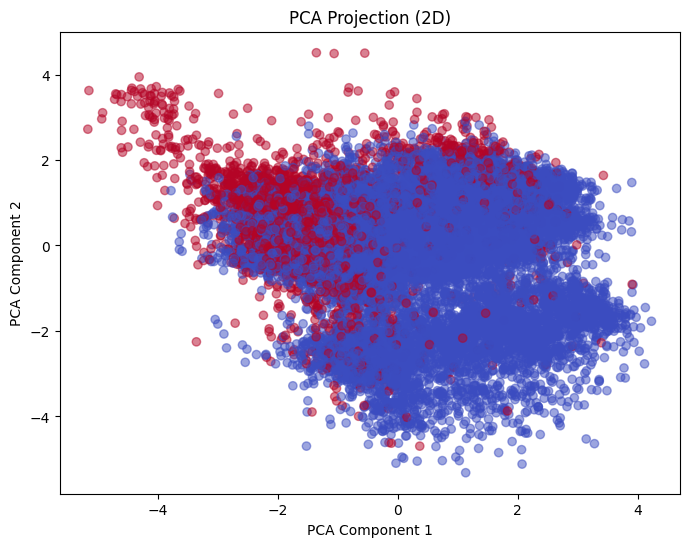


Evaluating: Logistic Regression
5-Fold CV F1 Score: 0.5575 ± 0.0148
Accuracy:  0.8183
Precision: 0.7268
Recall:    0.4545
F1 Score:  0.5592
AUC Score: 0.8502


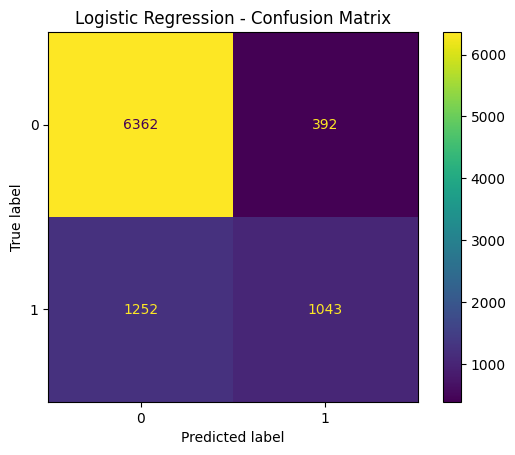

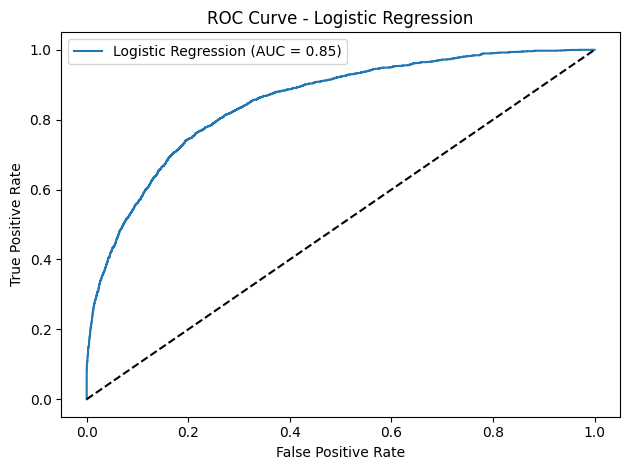


Evaluating: Decision Tree
5-Fold CV F1 Score: 0.6121 ± 0.0056
Accuracy:  0.8085
Precision: 0.6187
Recall:    0.6383
F1 Score:  0.6284
AUC Score: 0.7523


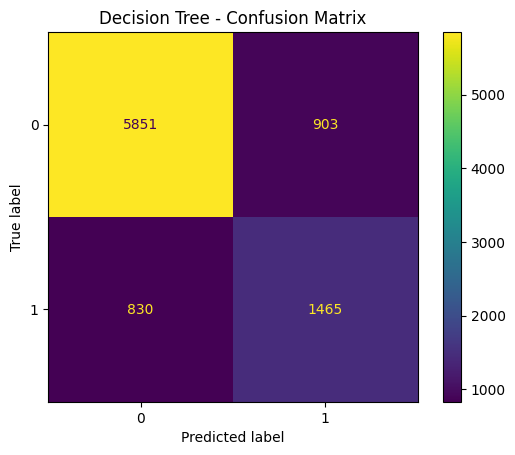

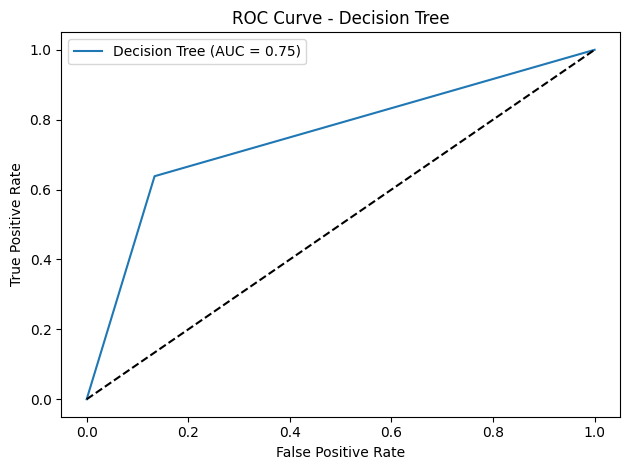


Evaluating: Random Forest
5-Fold CV F1 Score: 0.6753 ± 0.0144
Accuracy:  0.8516
Precision: 0.7424
Recall:    0.6353
F1 Score:  0.6847
AUC Score: 0.9049


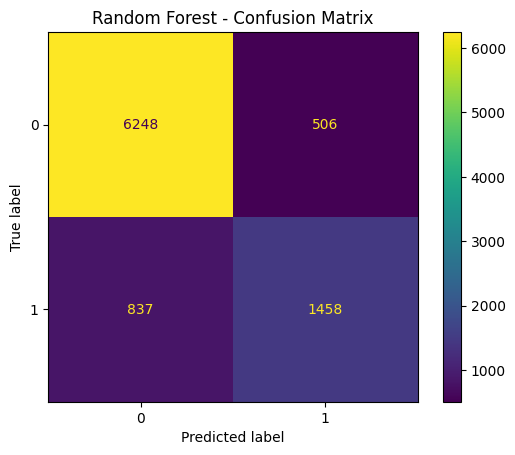

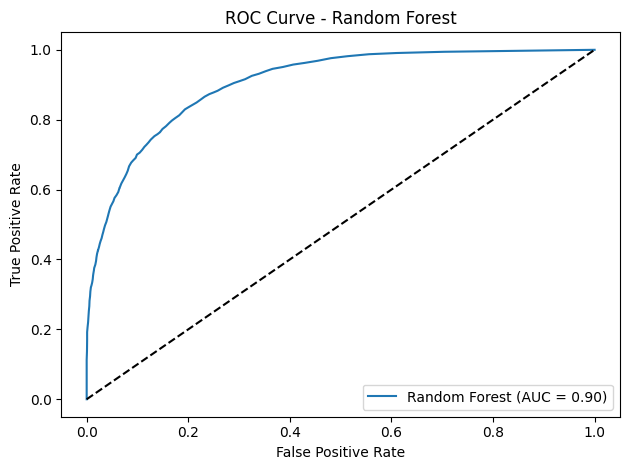


Evaluating: K-Nearest Neighbors
5-Fold CV F1 Score: 0.6147 ± 0.0174
Accuracy:  0.8227
Precision: 0.6725
Recall:    0.5869
F1 Score:  0.6268
AUC Score: 0.8447


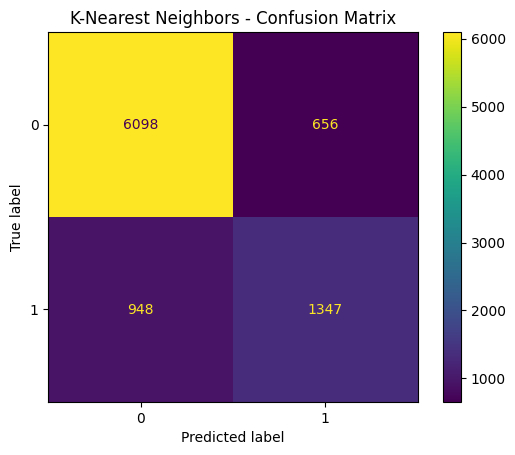

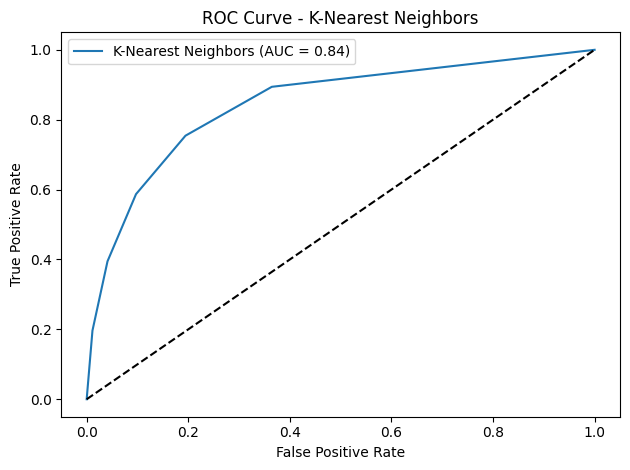


Evaluating: Support Vector Machine
5-Fold CV F1 Score: 0.6325 ± 0.0135
Accuracy:  0.8395
Precision: 0.7525
Recall:    0.5473
F1 Score:  0.6337
AUC Score: 0.8881


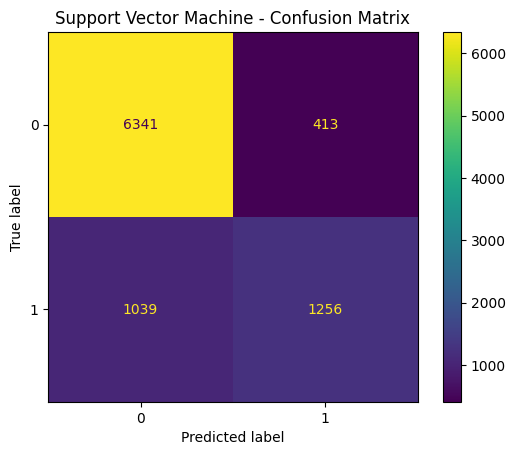

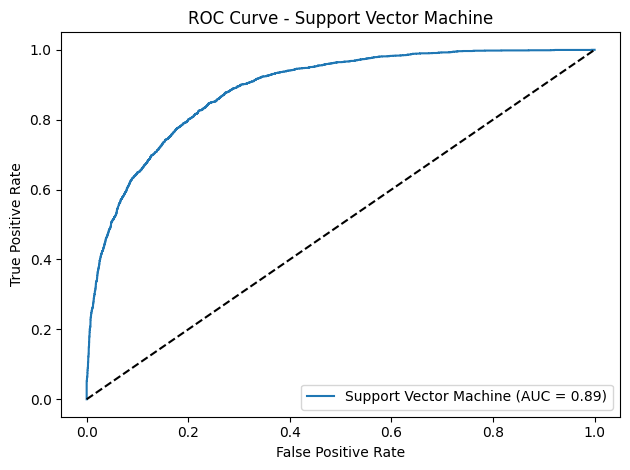


Evaluating: Naive Bayes
5-Fold CV F1 Score: 0.4669 ± 0.0122
Accuracy:  0.7964
Precision: 0.6978
Recall:    0.3481
F1 Score:  0.4645
AUC Score: 0.8471


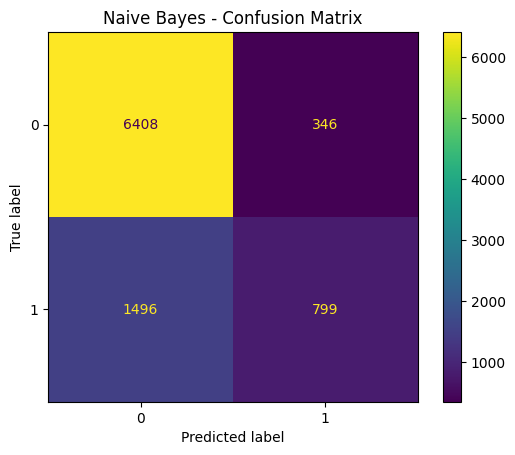

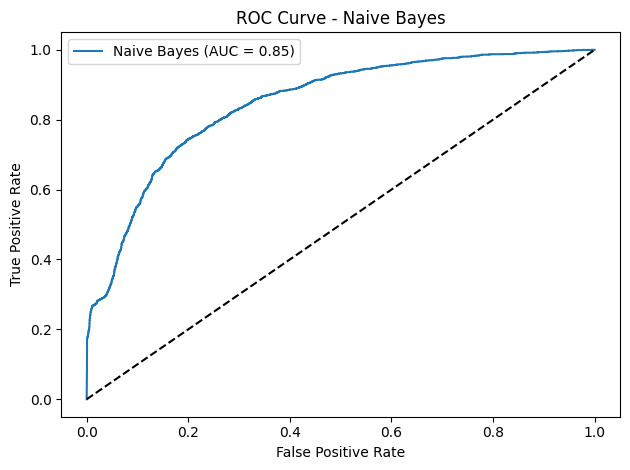


Evaluating: Neural Network
5-Fold CV F1 Score: 0.6379 ± 0.0182
Accuracy:  0.8336
Precision: 0.6872
Recall:    0.6309
F1 Score:  0.6579
AUC Score: 0.8837


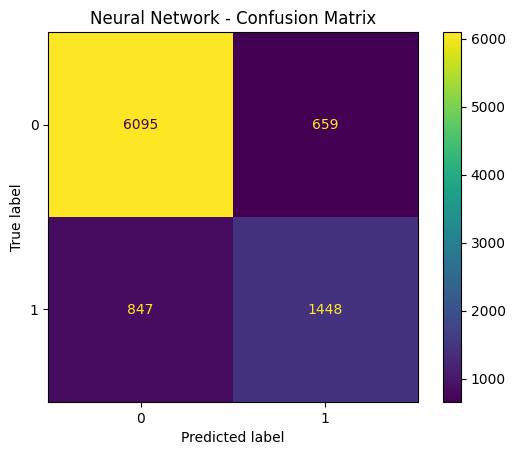

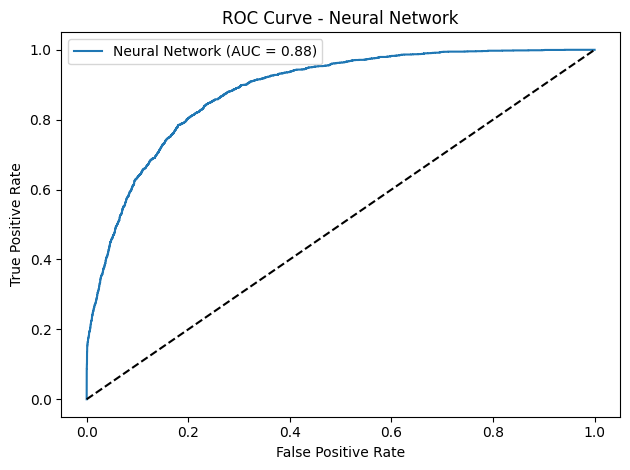


Final Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0           Random Forest  0.851586   0.742363  0.635294  0.684668  0.904869
1          Neural Network  0.833573   0.687233  0.630937  0.657883  0.883723
2  Support Vector Machine  0.839540   0.752546  0.547277  0.633703  0.888075
3           Decision Tree  0.808487   0.618666  0.638344  0.628351  0.752296
4     K-Nearest Neighbors  0.822743   0.672491  0.586928  0.626803  0.844672
5     Logistic Regression  0.818322   0.726829  0.454466  0.559249  0.850221
6             Naive Bayes  0.796442   0.697817  0.348148  0.464535  0.847104


In [1]:
# Authors: Nikshay Policepatel, Sai Krishna Mallikanti, Sowjanya Jaligama

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

# Load the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
                'marital.status', 'occupation', 'relationship', 'race', 'sex',
                'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

df = pd.read_csv("C:\\Users\\Nikshay\\Desktop\\adult.csv", names=column_names, header=0)
df.head()


# Replace '?' with NaN and drop missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save cleaned dataset (optional)
df.to_csv("cleaned_adult_income.csv", index=False)

# 1. Class Imbalance Check
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title("Income Class Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

print("Class distribution (%):")
print(df['income'].value_counts(normalize=True) * 100)

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Distribution Plots
# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Capital Gain Distribution
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['capital.gain'])
plt.title("Capital Gain Distribution")
plt.xlabel("Capital Gain")
plt.show()

# Separate features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Total variance explained:", round(sum(pca.explained_variance_ratio_) * 100, 2), "%")

# Visualize PCA components (2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection (2D)')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Function to evaluate models
def evaluate_model(model, name):
    print(f"\n{'='*60}\nEvaluating: {name}")

    # Cross-validation F1 Score
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"5-Fold CV F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # Calculate AUC score
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    auc = roc_auc_score(y_test, y_scores)
    print(f"AUC Score: {auc:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc
    }

# Evaluate models sequentially
results = []

# Logistic Regression
model = LogisticRegression()
results.append(evaluate_model(model, "Logistic Regression"))

# Decision Tree
model = DecisionTreeClassifier()
results.append(evaluate_model(model, "Decision Tree"))

# Random Forest
model = RandomForestClassifier()
results.append(evaluate_model(model, "Random Forest"))

# K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=5)
results.append(evaluate_model(model, "K-Nearest Neighbors"))

# Support Vector Machine
model = SVC(probability=True)
results.append(evaluate_model(model, "Support Vector Machine"))

# Naive Bayes
model = GaussianNB()
results.append(evaluate_model(model, "Naive Bayes"))

# Neural Network
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300)
results.append(evaluate_model(model, "Neural Network"))

# Create a DataFrame for comparison
final_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("\nFinal Model Comparison:")
print(final_df)
